# DIE DATA SCIENCE PIPELINE - EIN BEISPIEL MIT CODE

Ressourcen: <br />
https://towardsdatascience.com/machine-learning-project-predicting-boston-house-prices-with-regression-b4e47493633d
https://towardsdatascience.com/predicting-housing-prices-using-a-scikit-learns-random-forest-model-e736b59d56c5

In [1]:
import warnings
warnings.filterwarnings("ignore")

## 1 // DATA COLLECTION

In [2]:
from sklearn.datasets import load_boston
import numpy as np
import pandas as pd

# import the Boston Housing Prices Dataset from the sklearn library and store it in a pandas Dataframe
data = load_boston()
x_y = np.hstack((data.data, data.target.reshape(len(data.target), 1)))
df = pd.DataFrame(x_y, columns=list(data.feature_names)+['target'])

Wir arbeiten mit dem "Boston Housing Prices Dataset", ein Datensatz, der 1978 zusammengestellt wurde und 506 Häuser in den Vororten Bostons beinhaltet, die auf 13 Variablen beschrieben werden. **Unser Ziel: Den Verkaufspreis ungesehener Häuser mit bekannten Charakteristiken vorhersagen!** Der Datensatz ist frei zugänglich und zum Beispiel in der scikit learn library hinterlegt.

## 2 // DATA EXPLORATION & CLEANING

In [3]:
# the dataset comes with a description that can be obtained via the DESCR attribute
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
# Is our data loaded correctly and in the correct format?
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
# How many entries are in our dataset?
print(f"In unserem Datensatz befinden sich {len(df)} Häuser.")

In unserem Datensatz befinden sich 506 Häuser.


In [6]:
# What's the name of our columns?
print(list(df.columns))

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'target']


In [7]:
# We can change the names of the columns for better recognizability.
df = df.rename(columns=dict([(old, new) for old, new in zip(
               df.columns, ['crime_rate', 'big_lots', 'industry_rate', 'river_access',
                            'nitric_oxid', 'no_rooms', 'employ_dist', 'highway_access', 'before_1940',
                            'tax_rate', 'pupils_teachers', 'proportion_black', 'lower_status', 'house_price'])]))
df.head()

,crime_rate,big_lots,industry_rate,river_access,nitric_oxid,no_rooms,employ_dist,highway_access,before_1940,tax_rate,pupils_teachers,proportion_black,lower_status,house_price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
# Let's reinsure us that there are no missing values (as stated in the description).
df.isnull().sum()

crime_rate          0
big_lots            0
industry_rate       0
river_access        0
nitric_oxid         0
no_rooms            0
employ_dist         0
highway_access      0
before_1940         0
tax_rate            0
pupils_teachers     0
proportion_black    0
lower_status        0
house_price         0
dtype: int64

In [9]:
# Which datatypes do our features have?
df.dtypes

crime_rate          float64
big_lots            float64
industry_rate       float64
river_access        float64
nitric_oxid         float64
no_rooms            float64
employ_dist         float64
highway_access      float64
before_1940         float64
tax_rate            float64
pupils_teachers     float64
proportion_black    float64
lower_status        float64
house_price         float64
dtype: object

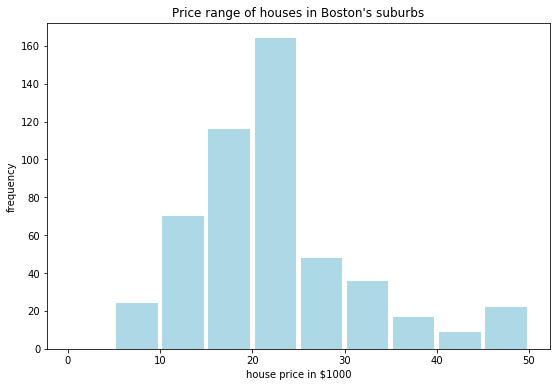

In [10]:
# How is our target variable distributed?
import matplotlib.pyplot as plt

plt.figure(figsize=(9,6))
plt.hist(df.house_price, rwidth=0.9, color="lightblue", bins=list(range(0, 51, 5)))
plt.title("Price range of houses in Boston's suburbs")
plt.xlabel("house price in $1000")
plt.ylabel("frequency")
plt.show()

In [11]:
# Let's look at the descriptives of our variables.
pd.options.display.float_format = '{:.2f}'.format
df.describe()

,crime_rate,big_lots,industry_rate,river_access,nitric_oxid,no_rooms,employ_dist,highway_access,before_1940,tax_rate,pupils_teachers,proportion_black,lower_status,house_price
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.39,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.23,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


In [12]:
pd.reset_option("all")


: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.



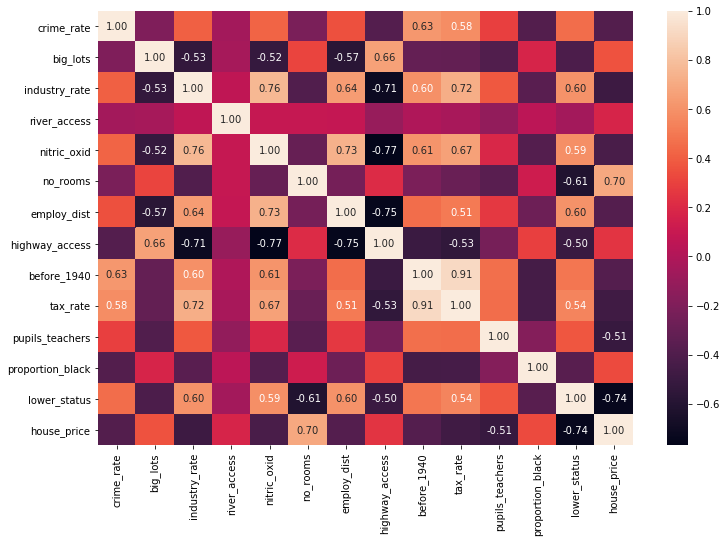

In [13]:
# Do our features correlate? Let's create a heatmap.

import seaborn as sns

plt.figure(figsize=(12, 8))

corr_table = np.corrcoef(df.values.T)

corr_heatmap = sns.heatmap(corr_table, cbar=True, annot=True, fmt='.2f',
                           annot_kws={'size': 10}, yticklabels=df.columns, xticklabels=df.columns)

# only display correlation values of medium size and higher
for t in corr_heatmap.texts:
    if float(t.get_text()) >= 0.5 or float(t.get_text()) <= -0.5:
        t.set_text(t.get_text())
    else:
        t.set_text("")

Beobachtungen:
- Wichtige features, die hoch mit dem Preis eines Hauses korrelieren, sind: die Anzahl der Räume, das SchülerInnen-LehrerInnen Verhältnis der Gegend, und der soziale Status der EinwohnerInnen.
- Geringer sozialer Status korreliert hoch mit folgenden Variablen: der Menge der ansässigen Industrie, der Nitritoxid-Konzentration, der Anzahl der Zimmer, der Distanz zum nächsten Industriezentrum, der Distanz zum nächsten Highway, und dem Steuersatz. Wir können alle diese Variablen (bis auf die Anzahl der Zimmer) ausschließen, da die Information, die diese Variablen bereitstellen, bereits zur großen Teilen im sozialen Status zu stecken scheinen.
- Aufgrund unseres Fachwissens können wir außerdem vermuten, dass die Anzahl der Grundstücke über 25.000 square feet eine geringere Rolle spielen als die anderen features. Wir elimieren dieses daher ebenso.

In [14]:
# eliminate unimportant features
df = df.drop(columns=['big_lots', 'industry_rate', 'nitric_oxid', 'employ_dist', 'highway_access', 'tax_rate'])
df.head()

,crime_rate,river_access,no_rooms,before_1940,pupils_teachers,proportion_black,lower_status,house_price
0,0.00632,0.0,6.575,1.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,6.421,2.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.185,2.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,6.998,3.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,7.147,3.0,18.7,396.90,5.33,36.2


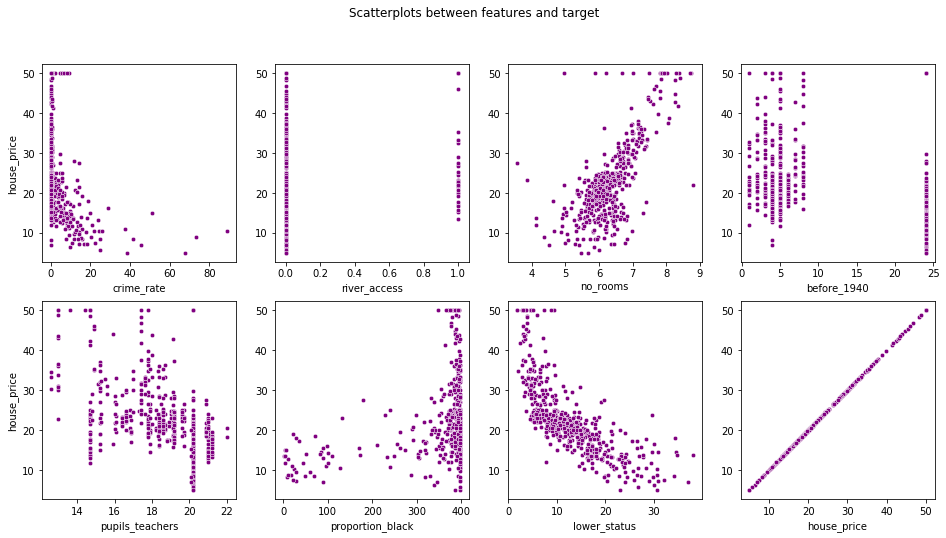

In [15]:
# Let's look at the relationship between our chosen features and the target variable.
fig, axs = plt.subplots(2, 4, figsize=(16, 8))
variable = list(df.columns)
col = 0
for i in range(2):
    for j in range(4):
        axs[i][j].scatter(df[variable[col]], df.house_price, s=20,
                          c='purple', edgecolors='white', linewidths=0.5)
        axs[i][j].set_xlabel(variable[col])
        col += 1
axs[0][0].set_ylabel('house_price')
axs[1][0].set_ylabel('house_price')
fig.suptitle('Scatterplots between features and target')
fig.show()

## DATA-PREPRATION: PERFORM TRAIN-TEST-SPLIT

In [16]:
from sklearn.model_selection import train_test_split

# shuffle the data and split into train (60%), validation (20%), and test set (20%)
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['house_price']), df.house_price,
                                                    test_size=0.2, random_state = 42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state = 42)

In [17]:
# reinsure that train-val-test split was successful
print(f"Training data has size: {X_train.shape} (X) and {y_train.shape} (y).")
print(f"Validation data has size: {X_val.shape} (X) and {y_val.shape} (y).")
print(f"Test data has size: {X_test.shape} (X) and {y_test.shape} (y).")

Training data has size: (303, 7) (X) and (303,) (y).
Validation data has size: (101, 7) (X) and (101,) (y).
Test data has size: (102, 7) (X) and (102,) (y).


## 3 + 4 // MODEL SELECTION & EVALUATION

## EIN EVALUATIONSKRITERIUM DEFINIEREN

In [18]:
# Root Mean Square Error (RMSE)
# the average deviation of true and predicted values
# standard evaluation metric for regression problems
import math

def rmse(x, y):
    return math.sqrt(((x-y)**2).mean())

def get_rmse(m, X_train, y_train, X_val, y_val):
    res_train = rmse(m.predict(X_train), y_train)
    res_val = rmse(m.predict(X_val), y_val)
    return res_train, res_val

## EIN BASELINE MODEL BAUEN

Wir entscheiden uns für einen **Random Forest für Regressionsprobleme**. Ein Random Forest bildet durch Bootstrapping mehrere Decision Trees aus unseren Trainingsdaten, deren Vorhersagen dann zum Schluss aggregiert werden. Der Algorithmus ist somit robuster als ein einzelner Decision Tree. Ein Random Forest hat außerdem folgende Vorteile:
- Er kann mit allen Datentypen umgehen (binär, kategorisch, metrisch). Die Datenvirbereitung ist also mit wenig Aufwand verbunden.
- Der Algorithmus sagt uns welche features für die Vorhersage besonders wichtig sind, ist also auch interpretierbar.
- Der andom Forest ist robust gegenüber Ausreißern.

In [19]:
from sklearn.ensemble import RandomForestRegressor

rmse_train = []
rmse_val = []
r2_train = []
r2_val = []

for i in range(10):
    model = RandomForestRegressor(random_state=2)  # without selecting hyperparameters
    model.fit(X_train, y_train)

    rmse_t, rmse_v = get_rmse(model, X_train, y_train, X_val, y_val)
    rmse_train.append(rmse_t)
    rmse_val.append(rmse_v)
    r2_train.append(model.score(X_train, y_train))
    r2_val.append(model.score(X_val, y_val))

print('Results averaged over 10 iterations:')
print(f'Train RMSE: {np.mean(rmse_train):.4f}, Val RMSE: {np.mean(rmse_val):.4f}')
print(f'Train R2: {np.mean(r2_train):.4f}, Val R2: {np.mean(r2_val):.4f}')

Results averaged over 10 iterations:
Train RMSE: 1.5915, Val RMSE: 4.2116
Train R2: 0.9718, Val R2: 0.7741


## FEATURE ENGINEERING

Die **feature importance** besagt, um wie viel ein einzelnes feature das Evaluationskriterium senkt oder erhöht, ist also ein Maß für die Wichtigkeit der feature. Je höher, desto wichtiger.

In [20]:
def feat_importance(m, df):
    imp = pd.DataFrame()
    imp['Features'] = df.columns
    imp['Importance'] = m.feature_importances_
    return imp.sort_values(by=['Importance']).reset_index().drop(columns=['index'])

importance = feat_importance(model, X_train)
importance

,Features,Importance
0,river_access,0.008704
1,before_1940,0.013235
2,pupils_teachers,0.019888
3,proportion_black,0.022680
4,crime_rate,0.067285
5,lower_status,0.255186
6,no_rooms,0.613023


Wir sehen, dass die Vorhersage vor allem von der Anzahl der Räume im Haus und dem sozialen Status der EinwohnerInnen der Gegend getrieben wird. Sind die anderen feature überhaupt entscheidend? Wir eliminieren jedes der feature vom Trainingsdatensatz (und behalten die übrigen) und sehen, wie sich unser Evalutionskriterium verändert.

In [21]:
# save training and evaluation data in a separate dataframe/variable
X_train_new = X_train
X_val_new = X_val

for feat in importance['Features']:
    try:
        # drop one feature
        X_train_new = X_train_new.drop(columns=[feat])
        X_val_new = X_val_new.drop(columns=[feat])
        
        rmse_train = []
        rmse_val = []
        r2_train = []
        r2_val = []
        
        # fit Random Forest ten times and calculate mean of evaluation metrics
        for i in range(10):
            model = RandomForestRegressor(random_state=2)  # without selecting hyperparameters
            model.fit(X_train_new, y_train)

            rmse_t, rmse_v = get_rmse(model, X_train_new, y_train, X_val_new, y_val)
            rmse_train.append(rmse_t)
            rmse_val.append(rmse_v)
            r2_train.append(model.score(X_train_new, y_train))
            r2_val.append(model.score(X_val_new, y_val))

        print(f'Feature dropped: {feat}')
        print('Results averaged over 10 iterations:')
        print(f'Train RMSE: {np.mean(rmse_train):.4f}, Val R2: {np.mean(rmse_val):.4f}')
        print(f'Train R2: {np.mean(r2_train):.4f}, Val RMSE: {np.mean(r2_val):.4f}')
        print('')
    
    except ValueError:
        print('No more features to eliminate.')

Feature dropped: river_access
Results averaged over 10 iterations:
Train RMSE: 1.6107, Val R2: 4.1514
Train R2: 0.9711, Val RMSE: 0.7805

Feature dropped: before_1940
Results averaged over 10 iterations:
Train RMSE: 1.6184, Val R2: 4.2493
Train R2: 0.9708, Val RMSE: 0.7700

Feature dropped: pupils_teachers
Results averaged over 10 iterations:
Train RMSE: 1.6548, Val R2: 4.4922
Train R2: 0.9695, Val RMSE: 0.7429

Feature dropped: proportion_black
Results averaged over 10 iterations:
Train RMSE: 1.6212, Val R2: 4.5474
Train R2: 0.9707, Val RMSE: 0.7366

Feature dropped: crime_rate
Results averaged over 10 iterations:
Train RMSE: 1.7813, Val R2: 5.2670
Train R2: 0.9646, Val RMSE: 0.6466

Feature dropped: lower_status
Results averaged over 10 iterations:
Train RMSE: 3.0333, Val R2: 7.0109
Train R2: 0.8974, Val RMSE: 0.3739

No more features to eliminate.


Wir sehen, dass die Vorhersage besser wird oder zumindest gleich bleibt, wenn wir die feature "river_access" und "before_1940" auslassen. Wir beschließen diese also nicht in unser finales Modell zu integrieren.

In [22]:
X_train_fin = X_train.drop(columns=['river_access', 'before_1940'])
X_val_fin = X_val.drop(columns=['river_access', 'before_1940'])

## 5 // FINE TUNING

Nachdem wir unsere finale Auswahl an features getroffen haben, müssen wir noch die Hyperparamter unseres Random Forest Modells so wählen, dass wir die bestmögliche Vorhersage erhalten.

Welche Hyperparameter lassen sich beim Random Forest Modell setzen?
- **n_estimators**: Die Anzahl an Bäumen, die unser Random Forest Ensemble bildet. Default: 100. 
- **min_samples_leaf**: Die kleinste Anzahl an Datenpunkten, die nach der Teilung eines Knoten in beiden der Blätter jeweils enthalten sein müssen. Ansonsten wird der Split nicht durchgeführt. Dieser Parameter hilft dem Modell später besser zu generalisieren.
- **max_features**: Die Anzahl an features, die bei jedem Teilungsschritt in Betracht gezogen werden.

Es gibt noch mehrere Hyperparameter. Der Übersicht wegen und weil andere Parameter zum Teil überlappend sind, beschränken wir uns im Folgenen auf genannte drei.

Die Hyperparameter suche kann nach der **Random Grid Search** Methode vorgenommen werden. Dabei werden für jeden Parameter eine Reihe von Werten gesetzt und alle Kombinationen von Parametern ausprobiert, um am Ende das beste Set aus allen Werten zu finden.

In [23]:
# Luckily scikit learn has implemented a Random Grid Search class for us :)
from sklearn.model_selection import GridSearchCV

# define values for parapemters for parameter grid
n_estimators = list(range(100, 1001, 100))
max_features = [0.5, 'auto', 'sqrt', 'log2']
min_samples_leaf = list(range(2, 21, 2))
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'min_samples_leaf': min_samples_leaf}
print(param_grid)

# create the base model to tune
model = RandomForestRegressor(random_state=2)
# fit the grid seatch model
grid_search = GridSearchCV(estimator=model,
                           param_grid=param_grid,
                           scoring='r2',
                           cv=3,
                           verbose=2,
                           n_jobs=-1)
grid_search.fit(X_train_fin, y_train)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'max_features': [0.5, 'auto', 'sqrt', 'log2'], 'min_samples_leaf': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]}
Fitting 3 folds for each of 400 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   14.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   58.0s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed:  7.9min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=2,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=

In [24]:
# inspect our best parameters and obtained R2 validation score
print(f'Our best paramters are: {grid_search.best_params_}')
print(f'Obtained R2 score on the validation set: {grid_search.best_score_:.4f}')

Our best paramters are: {'max_features': 0.5, 'min_samples_leaf': 2, 'n_estimators': 400}
Obtained R2 score on the validation set: 0.8100


## 6 // PREDICTION

In [25]:
# the best model is returned by the GridSearchCV instance
best_model = grid_search.best_estimator_

In [26]:
# prepare our test set to have the appropriate amount of features
X_test = X_test.drop(columns=['river_access', 'before_1940'])

In [27]:
# Evaluate the R2 score on the test set. Does our model generalize well?
print(f'Obtained R2 score on the test set: {best_model.score(X_test, y_test):.4f}')

Obtained R2 score on the test set: 0.8057


Fertig! Wir können unser Modell jetzt verwenden, um die Preise für Häuser in Bostoner Vororten voherzusagen!